In [19]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

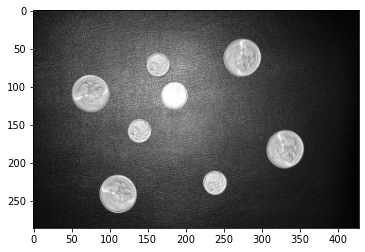

In [20]:
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

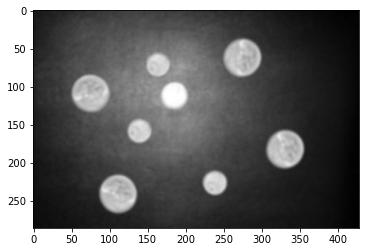

In [21]:
#Убираем лишние детали
#filtered = cv2.bilateralFilter(image,10,80,100,cv2.BORDER_DEFAULT)
blured = cv2.GaussianBlur(image, (7, 7),0)
plt.imshow(blured, cmap='gray')

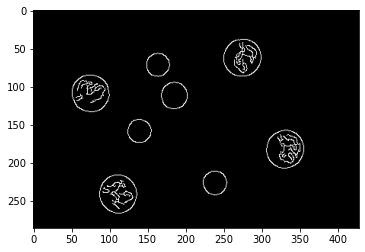

In [22]:
# Находим границы с помощью детектора Кэнни
edges = cv2.Canny(blured,20,100,0)
plt.imshow(edges,cmap='gray')

Число монет :  8


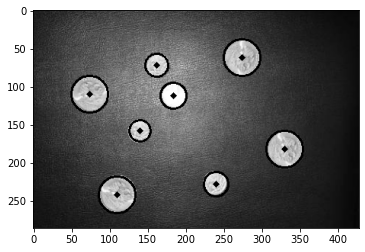

In [23]:
# Применяем преобразование Хафа для поиска окружностей
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=20,minRadius=5,maxRadius=70)
circles = np.uint16(np.around(circles))
j = 0
for i in circles[0,:]:
    j+=1
    # рисуем внешнюю окружность
    cv2.circle(image,(i[0],i[1]),i[2],(0,255,0),2)
    # рисуем центр окружности
    cv2.circle(image,(i[0],i[1]),2,(0,0,255),3)
print("Число монет : ",j)
plt.imshow(image,cmap='gray')